#CSC476/676. Basic Numpy, Linear Algebra and Image Processing exericises.
Assignemnts developed by Anthony Loporate and Bei Xiao. <br>
*Please insert your answers directly to the notebook.


In [38]:
# Run me first!!!
# default
import numpy as np
import scipy
import cv2
import matplotlib.pyplot as plt

# personally
from scipy import ndimage
import matplotlib.image as mpimg

##Section 1: basic numpy array manipulations

NumPy arrays are similar to Python's generic lists, but come with many additional functionalities. You can (and should!) read more about NumPy arrays [here](https://numpy.org/doc/stable/user/quickstart.html). We can create arrays using `np.array()` and a varieety of other NumPy functions, like `np.ones` and `np.zeros`. Here are a few examples of creating them:

In [39]:
a_1 = np.array([1,2,3])
a_2 = np.array([3,4,5])
a_3 = np.array([x**2 for x in range(0,10)])
a_4 = np.ones(3)
a_5 = np.zeros(3)

print(a_1,a_2,a_3,a_4,a_5)

[1 2 3] [3 4 5] [ 0  1  4  9 16 25 36 49 64 81] [1. 1. 1.] [0. 0. 0.]


Notice that the last two vectors have a "." after them. This is because `np.ones` and `np.zeros` create float arrays, as opposed to int arrays.

We can also add and subtract vectors using Python's built-in `+` and `-` operations, as well as multiply them by scalars with `*`. We cannot add or subtract scalars and vectors. To add two vectors, they must have the same length.

In [40]:
a_7 = a_1 + a_2
a_8 = 4 * (a_4 + a_5)

print(a_7,a_8)

[4 6 8] [4. 4. 4.]


There is an endless number of things you can do with NumPy arrays, far too many to enumerate a single tutorial. You should always feel comfortable with using online resources to learn more about different techniques you may need to solve a problem.

####Exercises: 

1. (1pts) Create an array, named my_array1, containing the numbers 1,4, and 6.
2. (2pts) Create an array, named my_array2, containing every even number between 0 and 100, using a list comprehension. 
3. (2pts) Take a slice of my_array2 containing the last 10 numbers, and store this array as my_array3. 
4. (2pts) Make an array named my_array4 such that my_array3 + my_array4 = `np.zeros(shape(my_array3))`. 
5. (3pts) Define a function `riffle` which takes two arrays with *n* elements (`a1` and `a2`) as an input, and returns an array `a3 = [a1[0], a2[0], a1[1], a2[1], ... a1[n-1], a2[n-1]]`.


In [41]:
# Exercise 1
# 1.1 and 1.2
my_array1 = np.array([1, 4, 6])
my_array2 = np.array([i for i in range(101) if i % 2 == 0])

print(my_array1, my_array2)

[1 4 6] [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100]


In [42]:
# 1.3
c = len(my_array2)
my_array3 = my_array2[-10:]
print(my_array3)

[ 82  84  86  88  90  92  94  96  98 100]


In [43]:
# 1.4
def offsetArray(arr):
  res = []
  for i in my_array3:
        if i > 0:
          res.append(-i)
        elif i == 0:
          res.append(0)
        else:
          res.append(abs(i))
  return np.array(res)

my_array4 = offsetArray(my_array3)
print(my_array4)

[ -82  -84  -86  -88  -90  -92  -94  -96  -98 -100]


In [44]:
# 1.5
def riffle(a1, a2):
  res = []
  for i in range(len(a1)):
    res.append(a1[i])
    res.append(a2[i])
  return res

# testing function
print(riffle([1, 100, 1000], [20000, 2000, 200]))


[1, 20000, 100, 2000, 1000, 200]


##Section 2: basic numpy matrix manipulations

Matrices are similar to vectors, but are doubly indexed instead of singly indexed. They often behave the same way and share functions with NumPy arrays. Generally speaking, our arrays can have as many indexes as we need. The number of indexes is called the dimension. Below are examples.

In [45]:
m_1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
m_2 = np.array([[i+j for i in range(100)] for j in range(100)])
m_3 = np.ones([5,5])
m_4 = np.zeros([5,5])
print(m_1, m_2, m_3, m_4)

[[1 2 3]
 [4 5 6]
 [7 8 9]] [[  0   1   2 ...  97  98  99]
 [  1   2   3 ...  98  99 100]
 [  2   3   4 ...  99 100 101]
 ...
 [ 97  98  99 ... 194 195 196]
 [ 98  99 100 ... 195 196 197]
 [ 99 100 101 ... 196 197 198]] [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


####Exercises: 

1. (2pts) Use list comprehensions to create a 10 by 10 matrix m_5 containing the numbers 1-100, such that `m_5[i][j+1] = m_5[i][j] + 1` and `m_5[i+1][j] = m_5[i][j] + 10`.

2. (2pts) Define a function `mat_rot` that takes a matrix and rotates it by 180 degrees.

3. (2pts) Define a function `mat_row_split` and `mat_col_split` that takes a matrix and returns the rows or columns, respectively. 

4. (2pts) Define a function `even_odd_split` that takes a matrix and returns two matrices, one containing only even numbers, and another containing only odd numbers (and zeros when necessary) whose sum is the input matrix.

5. (2pts) Define functions `mat_max` and `mat_min` which return the maximum and minum entry of an input matrix, respectively. 

In [46]:
# 2.1
m_5 = np.arange(1, 101).reshape(10, 10)
print(m_5)

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


In [47]:
# 2.2
def mat_rot(matrix):
  arrRotated = np.rot90(matrix, 2) # rotate 90*2 = 180 degrees
  return arrRotated

print(mat_rot(m_5))

[[100  99  98  97  96  95  94  93  92  91]
 [ 90  89  88  87  86  85  84  83  82  81]
 [ 80  79  78  77  76  75  74  73  72  71]
 [ 70  69  68  67  66  65  64  63  62  61]
 [ 60  59  58  57  56  55  54  53  52  51]
 [ 50  49  48  47  46  45  44  43  42  41]
 [ 40  39  38  37  36  35  34  33  32  31]
 [ 30  29  28  27  26  25  24  23  22  21]
 [ 20  19  18  17  16  15  14  13  12  11]
 [ 10   9   8   7   6   5   4   3   2   1]]


In [48]:
# 2.3
def mat_row_split(matrix):
  rowCount = len(matrix)
  return rowCount

def mat_col_split(matrix):
  colCount = len(matrix[0]) # if matrix is a square
  # colCount = len(list(zip(*matrix))) 
  return colCount


print(mat_row_split(m_5), mat_col_split(m_5))

10 10


In [49]:
# 2.4
def even_odd_split(matrix):
  oddArr, evenArr = [], []
  for i in range(len(matrix)):
    for j in range(len(matrix[i])):
      if matrix[i][j] % 2 == 0:
        evenArr.append(matrix[i][j])
      else:
        oddArr.append(matrix[i][j])
  return np.array(evenArr), np.array(oddArr)

print(even_odd_split(m_5))

(array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]), array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]))


In [50]:
# 2.5
def mat_max(matrix):
  return np.max(matrix)

def mat_min(matrix):
  return np.min(matrix)

print(mat_max(m_5), mat_min(m_5))

100 1


##Section 3: basic linear algebra

Now that we're familiar with basic NumPy manipulations, it's time to dive a bit deeper into tools from linear algebra! Here is a generic vector and matrix:

$\textbf{v}_{i} = \begin{bmatrix}
  v_{1} \\
  v_{2} \\
  \vdots \\
  v_{i} \\
 \end{bmatrix}$ 
 $\textbf{v}_{j} = \begin{bmatrix}
  v_{1} &&
  v_{2} &&
  \cdots &&
  v_{j} 
 \end{bmatrix}$
 $
 \textbf{M}_{i,j} =
 \begin{bmatrix}
  a_{1,1} & a_{1,2} & \cdots & a_{1,j} \\
  a_{2,1} & a_{2,2} & \cdots & a_{2,j} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  a_{i,1} & a_{i,2} & \cdots & a_{i,j}
 \end{bmatrix}$

 $\textbf{v}_{i}$ is referred to as a column vector while $\textbf{v}_{j}$ is referred to as a row vector. The matrix transposition takes a matrix $\textbf[{M}_{i,j}^T]=\textbf[{M}_{j,i}]$. 

 If we have two vectors $\textbf{v}^1_{j_{1}}$ and $\textbf{v}^2_{j_{2}}$, and $j_{1}=j_{2}$, we can compute the so-called 'dot product' of the vectors, defined as so (let's just say for now they have $n$ entries):

 $\textbf{v}^1_n \cdot \textbf{v}^2_n=(v^1_1)(v^2_1)+(v^1_2)(v^2_2)+\cdots+(v^1_n)(v^2_n)$

 ...where $v^1_{i}\in \textbf{v}^1_n$ and $v^2_{i}\in \textbf{v}^2_n$. Here is an example:

 $\begin{bmatrix} 1 && 2 && 3\end{bmatrix} \cdot \begin{bmatrix} -1 && 1 && -1\end{bmatrix} = (1)(-1)+(2)(1)+(3)(-1)=-1+2-3=-2$

 The determinant of a matrix (which must be square) is a scalar value which describes the dimensionality of the span of its column vectors. For a $2 \times 2$ matrix, it is defined as so:

 $ \begin{vmatrix} a && b \\ c && d\end{vmatrix}=ad-bc $

 For a $3 \times 3$ matrix:

 $ \begin{vmatrix} a && b && c \\ d && e && f \\ g && h && i \end{vmatrix} = a \begin{vmatrix} e && f \\ h && i\end{vmatrix} - b \begin{vmatrix} d && f \\ g && i\end{vmatrix} + c \begin{vmatrix} d && e \\ g && h\end{vmatrix}$

 This can be expanded out for arbitrarily large square matrices.

 We can multiply two matrices $\textbf{M}_{i_1,j_1}^1 \times \textbf{M}_{i_2,j_2}^2$ if $j_1=i_2$. The resulting matrix will take the form: 
 $\textbf{M}_{i_1,j_2}^3= \begin{bmatrix}
  \sum_{k=1}^{j_1} m^1_{1,k}m^2_{k,1} & \sum_{k=1}^{j_1} m^1_{1,k}m^2_{k,2} & \cdots & \sum_{k=1}^{j_1} m^1_{1,k}m^2_{k,j_{2}} \\
  \sum_{k=1}^{j_1} m^1_{2,k}m^2_{k,1} & \sum_{k=1}^{j_1} m^1_{2,k}m^2_{k,2} & \cdots & \sum_{k=1}^{j_1} m^1_{2,k}m^2_{k,j_2} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sum_{k=1}^{j_1} m^1_{i_1,k}m^2_{k,1}& \sum_{k=1}^{j_1} m^1_{i_1,k}m^2_{k,2}& \cdots & \sum_{k=1}^{j_1} m^1_{i_1,k}m^2_{k,j_2}
 \end{bmatrix}$

 ...where $m^1_{i,j}\in \textbf{M}^1$ and $m^2_{i,j}\in \textbf{M}^2$. Here is a more concrete example:

 $ \begin{bmatrix}
  3 & 2 & -3 \\
  0 & 4 & 0 \\
  8 & -3 & 1
 \end{bmatrix} \times \begin{bmatrix}
  0 &  -2 \\
  -1 &  1 \\
  -1 & 2
 \end{bmatrix} = \begin{bmatrix}
  (3)(0)+(2)(-1)+(-3)(-1) & (3)(-2)+(2)(1)+(-3)(2) \\
  (0)(0)+(4)(-1)+(0)(-1) & (0)(-2)+(4)(1)+(0)(2)  \\
  (8)(0)+(-3)(-1)+(1)(-1) & (8)(-2)+(-3)(1)+(1)(2) 
 \end{bmatrix}=\begin{bmatrix}
  1 & -10 \\
  -4 & 4  \\
  2 & -17 
 \end{bmatrix}$

 [Here](http://matrixmultiplication.xyz/) is a nifty visualization that should elucidate what's going on here if it remains unclear.

Exercises.
1. (2pts) Create two 1d arrays (vectors),  compute the following: 1) scaller product (dot) of the two vectors, 2) outer product of the two vectors, 3) L2 norm of the the vectors. 4) Distance between the vectors.  

2.  (3pts) Create a matrix 
\begin{equation}
  \begin{pmatrix}
    1 & 2  \\
    3 & 4 \\
  \end{pmatrix}
\end{equation}

 and compute the inversion of the matrix. 

3. (3pts) Matrix Linear Transformation. Let’s consider: what does a matrix do to a vector? Matrix multiplication has a geometric interpretation. When we multiply a vector, we either rotate, reflect, dilate or some combination of those three. So multiplying by a matrix transforms one vector into another vector. This is known as a linear transformation.
 A linear transformation of the plane 
 is a geometric transformation of the form. 
\begin{equation}
  f
  \begin{pmatrix}
    x & y
  \end{pmatrix}
  %
  \begin{pmatrix}
    a & b\\
    c & d \\
  \end{pmatrix}
    \begin{pmatrix}
    x\\
    y \\
  \end{pmatrix}  
\end{equation}
where 
$a$, $b$, $c$ and $d$ are real constants.

Linear transformations leave the origin fixed and preserve parallelism. Scaling, shearing, rotation and reflexion of a plane are examples of linear transformations.

Applying a geometric transformation to a given matrix in Numpy requires applying the inverse of the transformation to the coordinates of the matrix, create a new matrix of indices from the coordinates and map the matrix to the new indices. Since this can be tricky, let's start with a simple example involving a matrix that represents the indices itself.

Given a vector (v1=(2,3)) transformed by a matrix
\begin{equation}
  \begin{pmatrix}
    2 & 1 \\
    1 & 1  \\
  \end{pmatrix}
\end{equation}
So that $v_2=Av_1$.  Plot both v1 and V2 in a cartesian coordinates. 

4. (4pts) If  𝑇  is any linear transformation which maps  $ℝ^𝑛$  to  $ℝ^𝑚$,  there is always an  𝑚×𝑛  matrix  𝐴  with the property that
𝑇(𝑥⃗ )=𝐴𝑥⃗

Suppose  𝑇  is a linear transformation,  $𝑇:ℝ^2→ℝ^2  $ and
\begin{equation}
  T
  \begin{pmatrix}
    1\\ 1
  \end{pmatrix}
  =
  %
  \begin{pmatrix}
    1 \\
    2 \\
  \end{pmatrix}
  ,
  T
  \begin{pmatrix}
    0\\ -1
  \end{pmatrix}
  =
  %
  \begin{pmatrix}
    3 \\
    4 \\
  \end{pmatrix}
\end{equation}

Find the matrix  𝐴  of  𝑇  such that  𝑇(𝑥⃗ )=𝐴𝑥⃗   for all  𝑥⃗ . Show that your solution is correct by checking whether you can get back T from 𝐴𝑥⃗.
5. (3pts) Given a matrix A and a vector b. 

\begin{equation}
A=\begin{pmatrix}
    1 & 2 \\
    3 & 4  \\
\end{pmatrix}
\end{equation}

\begin{equation}
b=\begin{pmatrix}
    10 \\
    20  \\
\end{pmatrix}
\end{equation}
What is the solution of $Ax=b$? You can use numpy.linalg. Or inverting A. 

In [51]:
# 3.1
"""
(2pts) Create two 1d arrays (vectors), compute the following: 
1) scaller product (dot) of the two vectors, 
2) outer product of the two vectors, 
3) L2 norm of the the vectors. 
4) Distance between the vectors.
"""
a, b = np.array([1, 2]), np.array([4, 5])
c = np.dot(a, b)
d = np.outer(a, b)
e = np.linalg.norm(a-b)
f = a - b

print(c, d, e, f)

14 [[ 4  5]
 [ 8 10]] 4.242640687119285 [-3 -3]


In [52]:
# 3.2
matrix = np.matrix("1 2; 3 4")
inversedMatrix = np.linalg.inv(matrix)
print(matrix, inversedMatrix)

[[1 2]
 [3 4]] [[-2.   1. ]
 [ 1.5 -0.5]]


[2 3] [7 5]
<class 'list'>
[array([[2, 3],
       [2, 3]]), array([[7, 7],
       [5, 5]])]


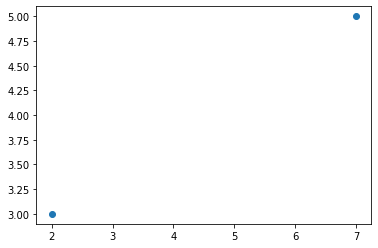

In [85]:
# 3.3 Matrix Linear Transformation
v1 = np.array([2, 3])
A = np.array([[2, 1], [1, 1]])
v2 = np.dot(v1, A) # alt: v1 @ A
print(v1, v2)

coordinates = np.meshgrid(v1, v2)
print(type(coordinates))
print(coordinates)

plt.scatter([v1[0], v2[0]], [v1[1], v2[1]])
plt.show()

In [55]:
# 3.4
 A = np.array([[4, -3], [6, -4]])
 print(np.dot(A, np.array([1, 1])) == np.array([1, 2]))

IndentationError: ignored

In [ ]:
# 3.5
# 1X+2Y=10, 3X+4Y = 20
# Ax = b

A = np.matrix("1 2; 3 4")
b = np.array([10, 20])

# Solve a linear matrix equation, or system of linear scalar equations
ans = np.linalg.solve(A, b)

print(ans)

##Section 4: Basic Scipy/OpenCV image processing

####Exercises: 

1. (2pts) SciPy or CV2 to load an image, storing it as "unnormalized image." Display the image using MatPlotlib.
2. (3pts) Decrease the contrast of lab_image, storing the result as decont_image. Display the image.
3. (5pts). Blur an image with a Gaussian filter of different kernal sizes. You can use ndimage.gaussianfilter, ndimage.sobel. Then sharpen the blurred image. 
4. (10pts) Write a function that convolves an image with a given convolution filter
<cod>function def myImageFilter(img0, h). </code>
As input, the function takes a greyscale image (img0) and a convolution filter stored in matrix h. The output of the function should be an image img1 of the same size as img0 which results from convolving img0 with h. You can assume that the fillter hi s odd sized along both dimensions. You will need to handle boundary cases on the edges of the image. For example, when you place a convolution mask on the top left corner of the image, most of the lter mask will lie outside the image. One solution is to output a zero value at all these locations, the better thing to do is to pad the image such that pixels lying outside the image boundary have the same intensity value as the nearest pixel that lies inside the image.  

You can use Numpy's function to pad an array (https://numpy.org/doc/stable/reference/generated/numpy.pad.html). But your code can not call on
Python's numpy.convolve, scipy.ndimage.convolve, cv2.filter2D, functions, or any other similar functions. You may compare your output to these functions for comparison and debugging. This function should be vectorized. Examples and meaning of vectorization can be found here (https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html). Specically, try to reduce the number of for loops that you use in the function as much as possible.

5. (optional 10pts) Implement Freeman and Adelson's steerable filter. The input should be a grayscale or color image and the output shoudl be a multi-banded image consisteing of $G^0_1$ of $0^0$ and $G^0_1$ of $90^0$. The coefficients for the filter can be found by Fremand and Adelson (1991). Test the various order filters on a number of images of your choice and see if you can reliablly found corners and intersection features.  


In [104]:
# 4.0
from google.colab import files
uploadImg = files.upload()

Saving 432381.jpg to 432381.jpg


(2pts) SciPy or CV2 to load an image, storing it as "unnormalized image." Display the image using MatPlotlib.

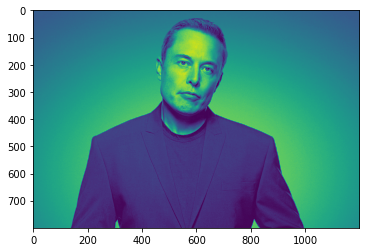

In [134]:
# 4.1
# Using 0 to read image in grayscale mode 
img = cv2.imread("musk.png", 0)
# print(type(img))

# Using cv2.imwrite() method and saving the image 
# cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('unnormalized_image.jpg', img) 

# Display the image using MatPlotlib
plt.figure()
plt.imshow(img)

(3pts) Decrease the contrast of lab_image, storing the result as decont_image. Display the image.
1. To increase the contrast levels of the image, simply multiply a constant positive value to each and every image pixel.
2. To decrease the contrast level of the image, then multiply a constant positive value less than 1 for each and every image pixel.
3. The allowed maximum limit is 255 and our pixel value should not increase 255. 
4. The only thing important is that the value of any pixel should not go below the minimum allowed pixel.

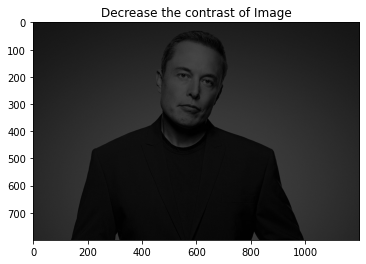

In [123]:
# 4.2
img = cv2.imread("unnormalized_image.jpg")
decont_image = cv2.filter2D(img, -1, 0.3)
cv2.imwrite('decont_image.jpg', decont_image) 
plt.figure()
plt.title("Decrease the contrast of Image")
plt.imshow(decont_image)

(5pts). Blur an image with a Gaussian filter of different kernal sizes. You can use ndimage.gaussianfilter, ndimage.sobel. Then sharpen the blurred image.

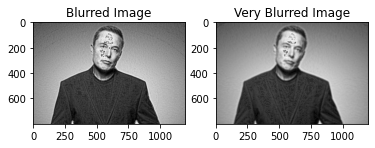

In [133]:
# 4.3 
img = cv2.imread("unnormalized_image.jpg")
blurredImg = ndimage.filters.gaussian_filter(img, sigma = 3)
filter_blurred_fB = ndimage.gaussian_filter(blurredImg, 1)
veryBlurredImg = ndimage.filters.gaussian_filter(img, sigma = 5)
filter_blurred_fV = ndimage.gaussian_filter(veryBlurredImg, 1)
alpha = 20

# sharpen
sharpenedBlurredImg = blurredImg + alpha * (blurredImg - filter_blurred_fB)
sharpenedVeryBlurredImg = veryBlurredImg + alpha * (veryBlurredImg - filter_blurred_fV)

# display
plt.subplot(1,2,1)
plt.title("Blurred Image")
plt.imshow(sharpenedBlurredImg, cmap=plt.cm.gray)
plt.subplot(1,2,2)
plt.title("Very Blurred Image")
plt.imshow(sharpenedVeryBlurredImg, cmap=plt.cm.gray)

(10pts) Write a function that convolves an image with a given convolution filter function def myImageFilter(img0, h). As input, the function takes a greyscale image (img0) and a convolution filter stored in matrix h. The output of the function should be an image img1 of the same size as img0 which results from convolving img0 with h. You can assume that the fillter h is odd sized along both dimensions. You will need to handle boundary cases on the edges of the image. For example, when you place a convolution mask on the top left corner of the image, most of the lter mask will lie outside the image. One solution is to output a zero value at all these locations, the better thing to do is to pad the image such that pixels lying outside the image boundary have the same intensity value as the nearest pixel that lies inside the image.

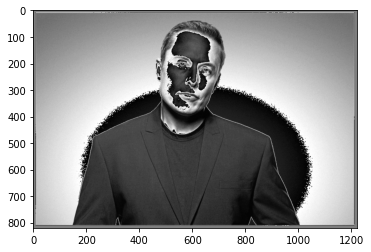

In [141]:
# 4.4
# im = np.zeros((800, 800, 3))

def myImageFilter(img0, h):
  # make sure the input h is 3*3 matrix
  if np.shape(h) != np.shape(np.zeros([3, 3])):
    print("The h should be 3*3 matrix")
    return 
  else:
    # handle the boundaries 
    img0 = cv2.copyMakeBorder(imgtest, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value = [255,255,255])
    # X_derivative of Gaussian
    Gx = np.array(h)/8 # dY/dx 
    Edged_imgGx = cv2.filter2D(img0, -1, Gx) 
    
    # Y_Derivative of Gaussian
    Gy = np.array(h)/8 # dY/dy
    Edged_imgGy = cv2.filter2D(img0, -1, Gy)
    
    # magnitude
    #x = ndimage.convolve(im, Gx)
    x = ndimage.convolve(img0, Gx)
    # Perform y convolution
    y = ndimage.convolve(img0, Gy)
    sobel = np.hypot(x, y)
    sobel= np.asarray(sobel, dtype=np.float64)
    plt.imshow(sobel, cmap='gray')
    
# output
imgtest = cv2.imread("unnormalized_image.jpg", 0)

# myImageFilter(imgtest, [[1, 2, 6] ,[2 ,0 ,0]])
myImageFilter(imgtest, [[1, 2, 3] ,[2 ,0 ,0], [1, 2, 1]])


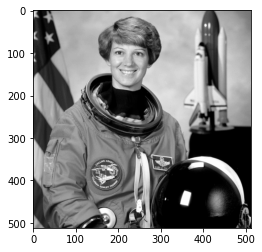

In [135]:
import imageio
img = imageio.imread('imageio:astronaut.png',as_gray=True)
plt.figure()
plt.imshow(img, cmap='gray')

In [62]:
test = np.zeros([3, 3])
print(test)
h =  [[1, 2, 6] ,[2 ,0 ,0], [1, 2, 1]]

print(np.shape(h))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)


5. (optional 10pts) Implement Freeman and Adelson's steerable filter. The input should be a grayscale or color image and the output shoudl be a multi-banded image consisteing of $G^0_1$ of $0^0$ and $G^0_1$ of $90^0$. The coefficients for the filter can be found by Fremand and Adelson (1991). Test the various order filters on a number of images of your choice and see if you can reliablly found corners and intersection features. 